In [1]:
# !pip install art

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense, Conv1D, MaxPooling1D
from art.estimators.classification import KerasClassifier, TensorFlowV2Classifier
# tf.compat.v1.disable_eager_execution()



x_test = np.load('/home/jovyan/Edge-IIoT/x_test.npy')
x_train = np.load('/home/jovyan/Edge-IIoT/x_train.npy')
x_val = np.load('/home/jovyan/Edge-IIoT/x_val.npy')
y_test = np.load('/home/jovyan/Edge-IIoT/y_test.npy')
y_train = np.load('/home/jovyan/Edge-IIoT/y_train.npy')
y_val = np.load('/home/jovyan/Edge-IIoT/y_val.npy')

2024-04-02 15:26:08.525104: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-02 15:26:08.527650: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-02 15:26:08.559219: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-02 15:26:09.233850: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/opt/conda/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
input_shape = x_train.shape[1:]
num_classes = len(np.unique(y_train))

dnn_model = Sequential()
dnn_model.add(Dense(50, input_shape=input_shape, activation='relu'))
dnn_model.add(Dense(units=30, activation='relu'))
dnn_model.add(Dense(units=20, activation='relu'))
dnn_model.add(Dense(units=num_classes, activation='softmax'))
dnn_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

dnn_model.fit(x_train, y_train, epochs=10, batch_size=128,
                     validation_data=(x_val, y_val),
                     callbacks=[early_stopping])

classifier = TensorFlowV2Classifier(model=dnn_model, nb_classes=4,
    input_shape=(52,),
    loss_object=tf.keras.losses.SparseCategoricalCrossentropy(),)

# hist = dnn_model.fit(x_train, y_train, epochs=10, batch_size=128,
#                      validation_data=(x_val, y_val),
#                      callbacks=[early_stopping])

# test_loss, test_acc = dnn_model.evaluate(x_test, y_test)
# print('Test accuracy:', test_acc)

# y_hat = dnn_model.predict(x_test)
# y_hat = np.argmax(y_hat, axis=-1)

Epoch 1/10


/opt/conda/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-04-02 15:26:11.621310: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8447 - loss: 0.7605 - val_accuracy: 0.9818 - val_loss: 0.0615
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9849 - loss: 0.0486 - val_accuracy: 0.9856 - val_loss: 0.0413
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9884 - loss: 0.0353 - val_accuracy: 0.9856 - val_loss: 0.0373
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9861 - loss: 0.0370 - val_accuracy: 0.9856 - val_loss: 0.0337
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9870 - loss: 0.0328 - val_accuracy: 0.9856 - val_loss: 0.0334
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9881 - loss: 0.0307 - val_accuracy: 0.9856 - val_loss: 0.0328
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9885 - loss: 0.0292 - val_accuracy: 0.9856 - val_loss: 0.0324
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9873 - loss: 0.0323 - val_accuracy: 0.9856 - val_loss: 0.0331
Epo

PGD - Batches: 66it [00:51,  1.30it/s]2024-04-02 15:27:06.134616: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


epsilon = 0.01
FPR: [0.00025031 0.         0.02513465 0.        ]
TPR: [0.67251462 1.         0.999484   1.        ]
FNR: [0.32748538 0.         0.000516   0.        ]
TNR: [0.99974969 1.         0.97486535 1.        ]
Accuracy: 0.9863178108497359
Precision(micro,macro,weighted): 0.9863178108497359,0.9908202415350278,0.9865749570331792
F1(micro,macro,weighted: 0.9863178108497359,0.9467234002572247,0.9851025158482887
FPR: 0.006346240700336822
tpr: 0.917999656002752
fnr: 0.08200034399724802
tnr: 0.9936537592996633


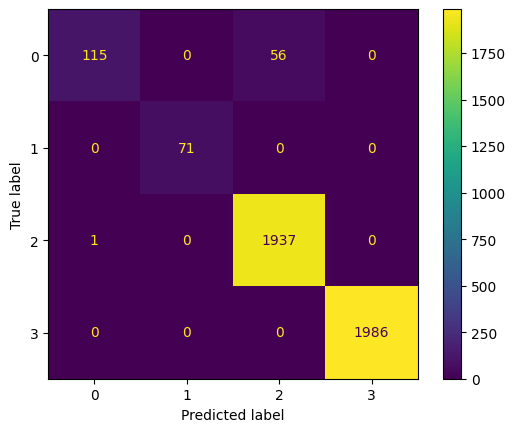

PGD - Batches: 66it [00:51,  1.28it/s]2024-04-02 15:27:58.212375: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


epsilon = 0.1
FPR: [0.03904881 0.         0.02737882 0.        ]
TPR: [0.64327485 1.         0.91950464 1.        ]
FNR: [0.35672515 0.         0.08049536 0.        ]
TNR: [0.96095119 1.         0.97262118 1.        ]
Accuracy: 0.9479116658665386
Precision(micro,macro,weighted): 0.9479116658665386,0.8451089062863344,0.9605304742720543
F1(micro,macro,weighted: 0.9479116658665387,0.8615100674999713,0.9529190652588749
FPR: 0.01660690652363929
tpr: 0.8906948744410045
fnr: 0.10930512555899552
tnr: 0.9833930934763607


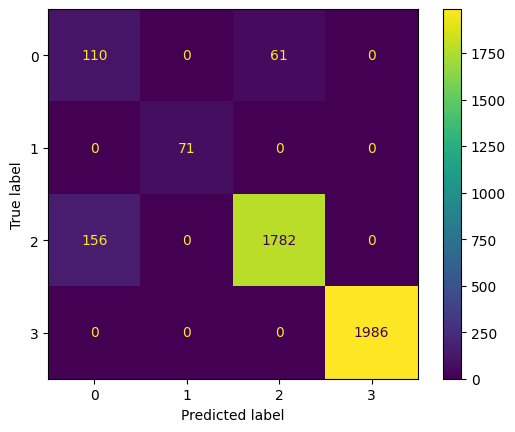

PGD - Batches: 66it [00:51,  1.30it/s]2024-04-02 15:28:50.399509: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


epsilon = 0.2
FPR: [0.07459324 0.         0.03231598 0.00183486]
TPR: [0.57894737 0.94366197 0.84623323 1.        ]
FNR: [0.42105263 0.05633803 0.15376677 0.        ]
TNR: [0.92540676 1.         0.96768402 0.99816514]
Accuracy: 0.9102256361017763
Precision(micro,macro,weighted): 0.9102256361017763,0.8013260380151186,0.9486667510043594
F1(micro,macro,weighted: 0.9102256361017763,0.8043075357045988,0.9251316374140595
FPR: 0.027186020598318848
tpr: 0.8422106425965494
fnr: 0.15778935740345063
tnr: 0.9728139794016811


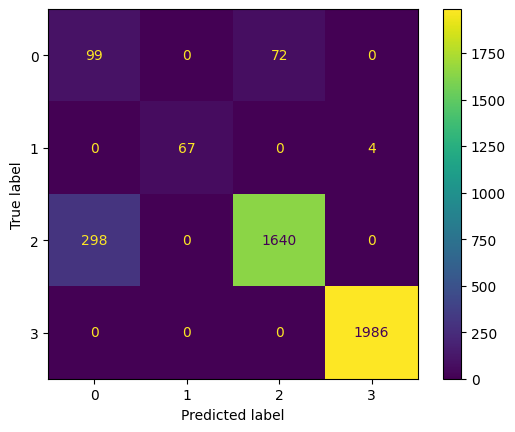

PGD - Batches: 66it [00:51,  1.27it/s]2024-04-02 15:29:42.715696: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


epsilon = 0.3
FPR: [0.23053817 0.12234432 0.11400359 0.03165138]
TPR: [0.51461988 0.83098592 0.46026832 0.6958711 ]
FNR: [0.48538012 0.16901408 0.53973168 0.3041289 ]
TNR: [0.76946183 0.87765568 0.88599641 0.96834862]
Accuracy: 0.5811329812770043
Precision(micro,macro,weighted): 0.5811329812770043,0.4808445767951949,0.8215107515656267
F1(micro,macro,weighted: 0.5811329812770043,0.4297041292887127,0.6617803881665613
FPR: 0.12463436546781977
tpr: 0.6254363035177843
fnr: 0.3745636964822157
tnr: 0.8753656345321802


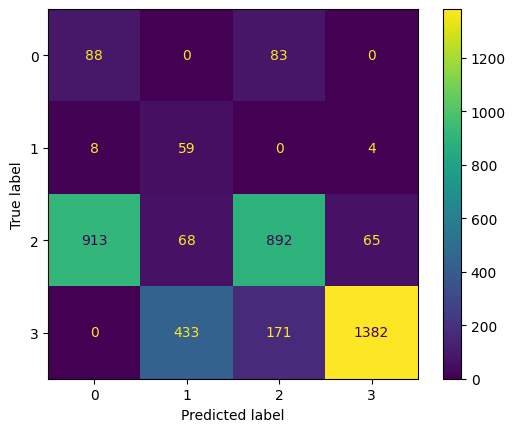

In [4]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from art.attacks.evasion import ProjectedGradientDescent

epsilon_values = [0.01, 0.1, 0.2, 0.3]

# Iterate over epsilon values
for epsilon in epsilon_values:
    # Craft adversarial samples with FGSM
    adv_crafter = ProjectedGradientDescent(classifier, eps=epsilon, batch_size=64)
    x_test_adv = adv_crafter.generate(x=x_test, y=y_test)

    filename = f'/home/jovyan/Edge-IIoT/transfer_attackmodel/x_test_adv_PGD_eps_{epsilon}.npy'
    np.save(filename, x_test_adv)

    # Evaluate the classifier on the adversarial examples
    preds = np.argmax(classifier.predict(x_test_adv), axis=1)
    # acc = np.sum(preds == np.argmax(y_test, axis=1)) / y_test.shape[0]
    # print("Test accuracy on adversarial sample (epsilon = %.2f): %.2f%%" % (epsilon, acc * 100))

    y_hat = preds
    # y_test_arg = np.argmax(y_test, axis=1)
    y_test_arg = y_test
    conf_matrix = confusion_matrix(y_test_arg, y_hat)
    # tn, fp, fn, tp = conf_matrix.ravel()
    cm = conf_matrix
    fp = cm.sum(axis=0) - np.diag(cm)
    fn = cm.sum(axis=1) - np.diag(cm)
    tp = np.diag(cm)
    tn = cm.sum() - (fp + fn + tp)
    
    fpr = fp / (fp + tn)
    tpr = tp / (tp + fn)
    fnr = fn / (fn + tp)
    tnr = tn / (tn + fp)
    accuracy = accuracy_score(y_test_arg, y_hat)
    precision_macro = precision_score(y_test_arg, y_hat, average='macro')
    precision_micro = precision_score(y_test_arg, y_hat, average='micro')
    precision_weighted = precision_score(y_test_arg, y_hat, average='weighted')
    f1_weighted = f1_score(y_test_arg, y_hat, average='weighted')
    f1_macro = f1_score(y_test_arg, y_hat, average='macro')
    f1_micro = f1_score(y_test_arg, y_hat, average='micro')
    # auc = roc_auc_score(y_test_arg, y_hat, multi_class='ovr')
    print(f"epsilon = {epsilon}")
    print(f"FPR: {fpr}")
    print(f"TPR: {tpr}")
    print(f"FNR: {fnr}")
    print(f"TNR: {tnr}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision(micro,macro,weighted): {precision_micro},{precision_macro},{precision_weighted}")
    print(f"F1(micro,macro,weighted: {f1_micro},{f1_macro},{f1_weighted}")
    # print(f"AUC: {auc}")
    
    print(f"FPR: {np.mean(fpr)}")
    print(f"tpr: {np.mean(tpr)}")
    print(f"fnr: {np.mean(fnr)}")
    print(f"tnr: {np.mean(tnr)}")
    
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    disp.plot()
    plt.show()
    
    metrics = {
        "model" : "dnn",
        "attack_model" : "pgd",
        "epsilon" : epsilon,
        "Accuracy": accuracy,
        "Precision-micro": precision_micro,
        "Precision-macro": precision_macro,
        "Precision-weighted": precision_weighted,
        "F1-micro": f1_micro,
        "F1-macro": f1_macro,
        "F1-weighted": f1_weighted,
        "FPR": np.mean(fpr),
        "TPR": np.mean(tpr),
        "FNR": np.mean(fnr),
        "TNR": np.mean(tnr),
        # "AUC": auc
    }
    metrics_df = pd.DataFrame([metrics])
    metrics_df.to_csv("/home/jovyan/Edge-IIoT/model.csv", mode='a', index=False)
